In [1]:
from matplotlib import animation, rc, cm, pyplot as plt
from celluloid import Camera
from IPython.display import HTML
import numpy as np
from scipy.sparse import csr_matrix
from tqdm import tqdm
from IPython.display import clear_output
from time import sleep
from matplotlib.pyplot import figure
from matplotlib import animation, rc
from IPython.display import HTML
from scipy.interpolate import griddata

In [2]:
from scipy import sparse
from scipy.sparse.linalg import spsolve

In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
from FiniteElements.MeshUtils import Mesh

In [5]:
g = lambda x: np.linalg.norm(x - np.array([0.9,0.0]).reshape(1, -1), axis=1)<11

In [6]:
geometry = {'center': np.array([0.9,0.0]),
           'radius': 12.0,
           'indicator': g,}

In [7]:
def f(x,y):
    if np.sqrt((x-3/4)**2 + (y-np.sqrt(3)/4)**2) < 0.1:
        return 10
    elif np.sqrt((x-8)**2 + (y-np.sqrt(3)/4)**2) < 0.1:
        return -10
    else:
        return 0
    

In [8]:
mesh = Mesh(mesh_size=0.1, geometry=geometry)

In [9]:
fun = lambda x, y: 0.1*np.sin((x/10-12)**2 + (y/10 -12)**2)

In [10]:
# solution=mesh.solve(lambda x,y: (x-3/4)-(y-np.sqrt(3)/4))
solution=mesh.solve(charge_density=f, boundary_condition=fun)

/home/revealo/.local/lib/python3.8/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


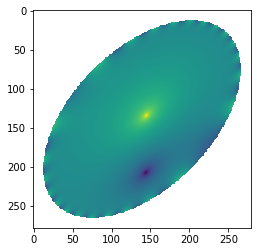

In [11]:
plt.imshow(solution.reshape(mesh.number_of_divisions + 1, mesh.number_of_divisions + 1))

In [12]:
def surface_plot(viewing_angle):
    X = mesh._vertices - np.array([3/4, np.sqrt(3)/4]).reshape(1, -1)
    _x = X[:,0]
    _y = X[:,1]

    L=1000
    x=np.linspace(mesh.geometry['center'][0] - mesh.geometry['radius'], 
                  mesh.geometry['center'][0] + mesh.geometry['radius'], L)
    y=np.linspace(mesh.geometry['center'][1] - mesh.geometry['radius'], 
                  mesh.geometry['center'][1] + mesh.geometry['radius'], L)
    xv, yv = np.meshgrid(x, y)
    z = griddata((_x, _y) ,solution, (xv, yv), method='linear')
    z[np.isnan(z)] = 0.0

    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    surf = ax.plot_surface(xv, yv, z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=True)

    # A StrMethodFormatter is used automatically
    ax.zaxis.set_major_formatter('{x:.02f}')

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    ax.view_init(elev=None, azim=viewing_angle)
    plt.show()
    plt.imshow(z)
    plt.show()

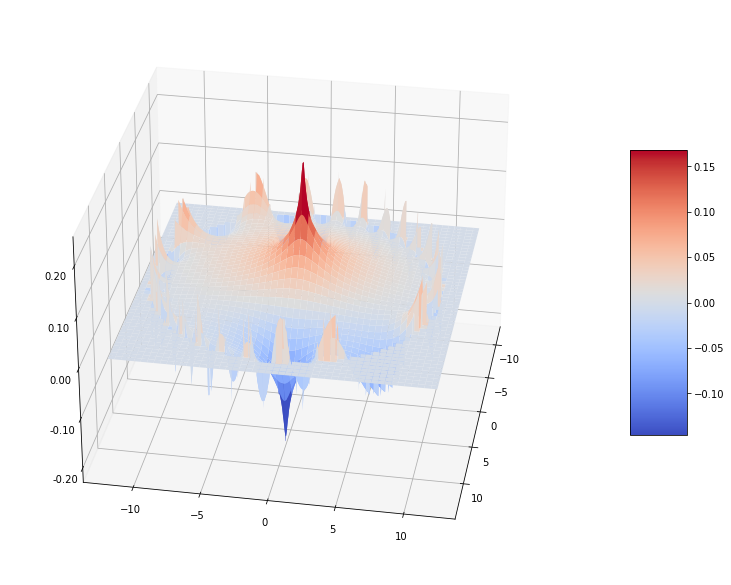

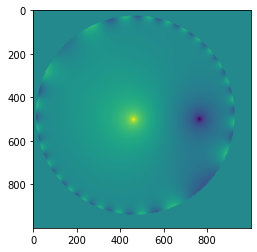

In [13]:
surface_plot(viewing_angle=10)